In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gamma, multivariate_normal
import data

In [2]:
mu = [np.array([[0.0], [0.0], [0.0], [0.0], [0.0]])]
gauss_lambda = [np.identity(5)*1]
a = [1]
b = [0.1]

def phi_function(x, mu):
    return sum([mu[n]*(x**n) for n in range(5)])


def phi(x):
    return np.array([x**n for n in range(5)]).reshape(-1,1)
        

def gen_lambda_dist():
    i = len(mu)-1
    return gamma(a[i], scale=1/b[i])

def gen_w_dist(lmd):
    i = len(mu)-1
    return multivariate_normal(mu[i].flatten(), np.linalg.inv(gauss_lambda[i])/lmd)

def draw(pdf, range_min, range_max, step):
    xs = np.arange(range_min, range_max, step)
    ys = [pdf.pdf(x) for x in xs]
    plt.plot(xs, ys)
    plt.show()

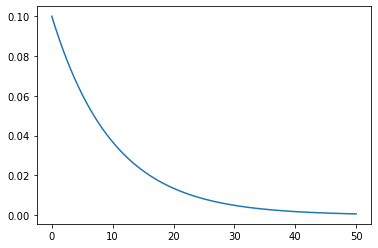

In [3]:
lambda_dist = gen_lambda_dist()
draw(lambda_dist, 0, 50, 0.01)

In [4]:
#lmd = lambda_dist.rvs(1)
#print(lmd)
w_dist = gen_w_dist(10)

In [5]:
w_dist.rvs(10)

array([[-0.16605772,  0.48972365,  0.45659225, -0.14275282, -0.01702599],
       [-0.21557279,  0.16798301, -0.26100587,  0.21652716,  0.69141939],
       [ 0.2783254 , -0.31138009, -0.10220862, -0.41364321,  0.1833057 ],
       [ 0.04261769,  0.53411961, -0.33406071, -0.089207  , -0.30196845],
       [-0.11193816,  0.01603613,  0.29326508, -0.03714743, -0.33924057],
       [ 0.12720088, -0.10373716,  0.25335225, -0.62206849,  0.54908378],
       [ 0.38156015,  0.01692283,  0.15659364, -0.13213161,  0.13184192],
       [ 0.26497465, -0.12132806,  0.40214501, -0.87946489, -0.31397262],
       [-0.30007657,  0.24843831, -0.14858835,  0.47954922, -0.1219537 ],
       [-0.15249117,  0.0182162 , -0.35859811, -0.06376608, -0.35596113]])

In [6]:
def draw_data(data):
    xs = [e[0] for e in data]
    ys = [e[1] for e in data]
    plt.scatter(xs, ys)
    plt.show()

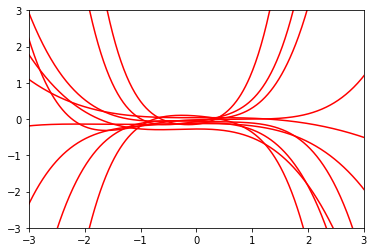

In [13]:
def draw_estimate(data, mus):
    
    xs = np.arange(-5, 5, 0.01)
    
    for mu in mus:
        ys = [phi_function(x, mu) for x in xs]
        plt.plot(xs, ys, color="red")
    
def draw_estimates(num, data):
    mus = []

    lmd_dist = gen_lambda_dist()
    lmds = lmd_dist.rvs(num)

    for lmd in lmds: 
        w_dist = gen_w_dist(lmd)
        mus.append(w_dist.rvs(1))
    
    draw_estimate(data, mus)
    
    plt.xlim(-3,3)
    plt.ylim(-3,3)
    plt.show()
   
draw_estimates(10, data)

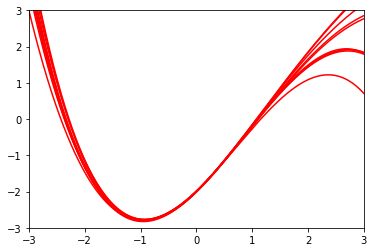

In [62]:
mu = [np.array([[-2.0], [1.5], [0.5], [-0.2], [0.01]])]
gauss_lambda = [np.identity(5)*100]
w_dist = gen_w_dist(1)
draw_estimates(10, data)

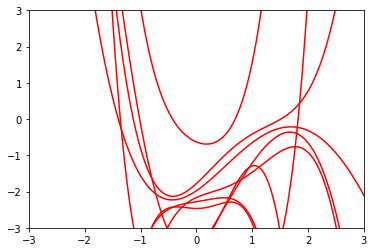

In [54]:
mu = [np.array([[-2.0], [1.5], [0.5], [-0.2], [0.001]])]
gauss_lambda = [np.identity(5)*0.01]
w_dist = gen_w_dist(1)
draw_estimates(10, data)

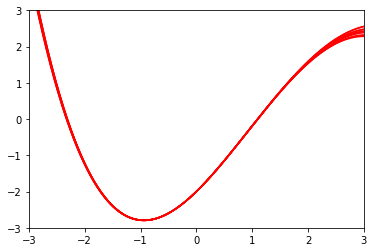

In [61]:
mu = [np.array([[-2.0], [1.5], [0.5], [-0.2], [0.01]])]
gauss_lambda = [np.identity(5)*10000]
w_dist = gen_w_dist(1)
draw_estimates(10, data)